In [27]:
import sys
from mpl_toolkits import mplot3d
from mpl_toolkits.mplot3d import Axes3D
import os
import matplotlib.pyplot as plt
import numpy as np
import ot
import time
import numba
import numpy as np
print(os.getcwd())
os.chdir(os.getcwd())
from sopt.library import *
from sopt.lib_ot import * 



/home/baly/projects/sliced_opt


In [28]:
import opt1d

<function opt1d.PyCapsule.solve>

In [30]:
#test1
Lambda_list=np.array([100.0]).astype(np.float64)
k=5
print('start')
n_list=np.array([1e2,1e3,2e3,4e3,5e3,6e3,7e3,8e3,9e3,1e4,2e4,3e4,4e4,5e4,6e4,7e4,8e4,9e4,1e5],dtype=np.int64)
N=len(n_list)
D=len(Lambda_list)
time_lp_list=np.zeros((N,D,k))
time_new_list=np.zeros((N,D,k))
time_new_C_list=np.zeros((N,D,k))
time_sinkhorn_list=np.zeros((N,D,k))

for (ni,n) in enumerate(n_list):
    m=n #+1000
    print('n',n)
    print('m',m)
    mu=np.ones(n,dtype=np.float64)
    nu=np.ones(m,dtype=np.float64)
    for i in range (k):
        X=np.random.uniform(-20,20,n).astype(np.float64)
        Y=np.random.uniform(-20,20,m).astype(np.float64)


        #M_s=cost_matrix(X_s,Y_s)
        for (j,Lambda) in enumerate(Lambda_list):        
            # start_time = time.time()
            # obj,phi,psi,piRow,piCol=solve_opt(M_s,Lambda) #,verbose=False,plots=False)
            # end_time = time.time()
            # time_new_list[ni,j,i]=end_time-start_time
            #print('ours numba done')
            X_s=X.copy()
            Y_s=Y.copy()
            start_time = time.time()
            X_s.sort()
            Y_s.sort()
            obj,phi,psi,piRow,piCol=pot1d.solve(X_s,Y_s,Lambda) #,verbose=False,plots=False)
            end_time = time.time()
            time_new_C_list[ni,j,i]=end_time-start_time
                
            # if n<=4e4:
            #     numItermax=int(200*n*np.log(n))
            #     X1=X.copy()
            #     Y1=Y.copy()
            #     start_time = time.time()
            #     M=cost_matrix(X1,Y1)
            #     cost,gamma=opt_lp(mu,nu,M,Lambda,numItermax)
            #     end_time = time.time()
            #     time_lp_list[ni,j,i]=end_time-start_time
                
                # X1=X.copy()
                # Y1=Y.copy()
                # reg=np.float32(max(Lambda/40,0.1))
                # numItermax=int(200*n*np.log(n))
                # start_time=time.time()
                # M=cost_matrix(X1,Y1)
                # sinkhorn_knopp_opt(mu,nu,M,Lambda,reg,numItermax=numItermax)
                # end_time = time.time()
                # time_sinkhorn_list[ni,j,i]=end_time-start_time
    
 
time_list={}
time_list['n_list']=n_list
time_list['lp']=time_lp_list 
time_list['new']=time_new_list
time_list['new_C']=time_new_C_list
time_list['sinkhorn']=time_sinkhorn_list

torch.save(time_list,'experiment/reviewer/result/time_list_large_new.pt')

start
n 100
m 100
n 1000
m 1000
n 2000
m 2000
n 4000
m 4000
n 5000
m 5000
n 6000
m 6000
n 7000
m 7000
n 8000
m 8000
n 9000
m 9000
n 10000
m 10000
n 20000
m 20000
n 30000
m 30000
n 40000
m 40000
n 50000
m 50000
n 60000
m 60000
n 70000
m 70000
n 80000
m 80000
n 90000
m 90000
n 100000
m 100000


In [33]:
time_list={}
time_list['n_list']=n_list
time_list['lp']=time_lp_list 
time_list['new']=time_new_list
time_list['new_C']=time_new_C_list
time_list['sinkhorn']=time_sinkhorn_list
torch.save(time_list,'experiment/reviewer/result/time_list_large_new.pt')
print('done')

# print('slop of our method in C is ',slop_loglog(time_new_C_list[j][:],n_list[:]))
# print('slop of Sinkhorn is ',slop_loglog(time_sinkhorn_list[j][:],n_list[:]))

done


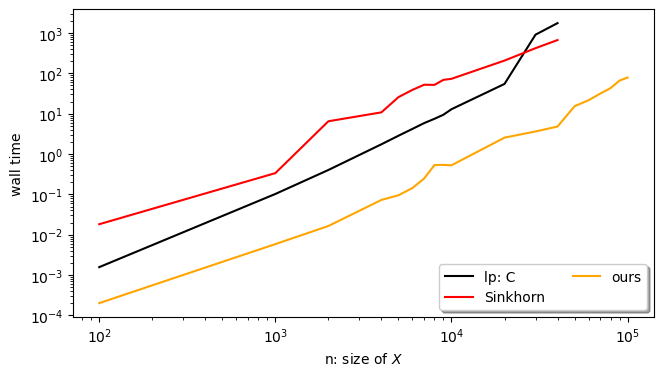

In [34]:
#n_list=np.array([1e2,4e2,8e2,1e3,2e3,4e3,8e3,1e4,2e4,4e4,8e4,1e5],dtype=np.int64)
time_list=torch.load('experiment/reviewer/result/time_list_large_n1.pt')
n_list=time_list['n_list']
time_lp_list=time_list['lp'].mean(2)
time_list=torch.load('experiment/reviewer/result/time_list_large_new.pt')
time_new_C_list=time_list['new_C'].mean(2)
time_list=torch.load('experiment/reviewer/result/time_list_large_n_sinkhorn.pt')
time_sinkhorn_list=time_list['sinkhorn'].mean(2)
N=len(n_list)

fig = plt.figure(figsize=(15/2,8/2))
ax = plt.subplot(111)
for j in range(D):
    ax.loglog(n_list[:-6],time_lp_list[:,j][:-6],color='black',label='lp: C')
    ax.loglog(n_list[:-6],time_sinkhorn_list[:,j][:-6],'red',label='Sinkhorn')
    ax.loglog(n_list[:],time_new_C_list[:,j],color='orange',label='ours')
#    box = ax.get_position()
#    ax.set_position([box.x0, box.y0 + box.height * 0.1,
               #  box.width, box.height * 0.9])
#plt.legend(loc='upper center',bbox_to_anchor=(0.5, 1.19),fancybox=True, shadow=True, ncol=3)
#plt.legend(bbox_to_anchor=(0.95,1.0))
ax.legend(loc='lower right',fancybox=True, shadow=True, ncol=2)
ax.set_xlabel('n: size of $X$')
ax.set_ylabel("wall time")
plt.savefig('experiment/reviewer/result/time_log_large_n.pdf',format='pdf',dpi=800,bbox_inches='tight')
#plt.title('wall-clock time with accelaration')
plt.show()

In [35]:
def slop_loglog(time_list,n_list):
    N=len(time_list)
    log_time_list=np.log(time_list)
    log_n_list=np.log(n_list)
    A = np.vstack((log_n_list,np.ones(N))).T
    y = log_time_list.reshape(N,1)    
    # Direct least square regression
    alpha = np.dot((np.dot(np.linalg.inv(np.dot(A.T,A)),A.T)),y)
    return alpha[0] 

# print slops of all the time:
for j in range(D):
    print('Lambda=',(Lambda_list[j]))
    L=time_lp_list[:,j][:-6]
    print('slop of lp is ',slop_loglog(L,n_list[:-6]))
    L=time_new_C_list[:,j]
    print('slop of ours is ',slop_loglog(L,n_list))
    L=time_sinkhorn_list[:,j][:-6]
    print('slop of sinkhorn is ',slop_loglog(L,n_list[:-6]))

Lambda= 100.0
slop of lp is  [2.26210321]
slop of ours is  [1.93514815]
slop of sinkhorn is  [1.82272263]


In [107]:
@nb.njit(nb.types.Tuple((nb.float64,nb.float64[:],nb.float64[:],nb.int64[:],nb.int64[:]))(nb.float64[:,:],nb.float64))
def solve_opt(c,lam): #,verbose=False):
    M,N=c.shape
    
    phi=np.full(shape=M,fill_value=-np.inf)
    psi=np.full(shape=N,fill_value=lam)
    # to which cols/rows are rows/cols currently assigned? -1: unassigned
    piRow=np.full(M,-1,dtype=np.int64)
    piCol=np.full(N,-1,dtype=np.int64)
    # a bit shifted from notes. K is index of the row that we are currently processing
    K=0
    # Dijkstra distance array, will be used and initialized on demand in case 3 subroutine
    dist=np.full(M,np.inf)

    jLast=-1
    while K<M:
#        if verbose: print(f"K={K}")
        if jLast==-1:
            j=np.argmin(c[K,:]-psi)
        else:
            j=jLast+np.argmin(c[K,jLast:]-psi[jLast:])
        val=c[K,j]-psi[j]
        if val>=lam:
            #if verbose: print("case 1")
            phi[K]=lam
            K+=1
        elif piCol[j]==-1:
            #if verbose: print("case 2")
            piCol[j]=K
            piRow[K]=j
            phi[K]=val
            K+=1
            jLast=j
        else:
            #if verbose: print("case 3")
            phi[K]=val
            #assert piCol[j]==K-1
            # Dijkstra distance vector and currently explored radius
            dist[K]=0.
            dist[K-1]=0.
            v=0

            # iMin and jMin indicate lower end of range of contiguous rows and cols
            # that are currently examined in subroutine;
            # upper end is always K and j
            iMin=K-1
            jMin=j
            # threshold until an entry of phi hits lam
            if phi[K]>phi[K-1]:
                lamDiff=lam-phi[K]
                lamInd=K
            else:
                lamDiff=lam-phi[K-1]
                lamInd=K-1
            resolved=False
            while not resolved:
                # threshold until constr iMin,jMin-1 becomes active
                if jMin>0:
                    lowEndDiff=c[iMin,jMin-1]-phi[iMin]-psi[jMin-1]
                    # catch: empty rows in between that could numerically be skipped
                    if iMin>0:
                        if piRow[iMin-1]==-1:
                            lowEndDiff=np.infty
                else:
                    lowEndDiff=np.infty
                # threshold for upper end
                if j<N-1:
                    hiEndDiff=c[K,j+1]-phi[K]-psi[j+1]-v
                else:
                    hiEndDiff=np.infty
                if hiEndDiff<=min(lowEndDiff,lamDiff):
                 #  if verbose: print("case 3.1")
                    v+=hiEndDiff
                    
                    domain1=arange(iMin,K)
                    phi[domain1]+=v-dist[domain1]
                    psi[piRow[domain1]]-=v-dist[domain1]
                    i=K-1
                    
                    # for i in range(iMin,K):
                    #     phi[i]+=v-dist[i]
                    #     psi[piRow[i]]-=v-dist[i]
                    phi[K]+=v
                    piRow[K]=j+1
                    piCol[j+1]=K
                    jLast=j+1
                    resolved=True
                elif lowEndDiff<=min(hiEndDiff,lamDiff):
                    if piCol[jMin-1]==-1:
                    #    if verbose: print("case 3.2a")
                        v+=lowEndDiff
                        
                        domain1=arange(iMin,K)
                        phi[domain1]+=v-dist[domain1]
                        psi[piRow[domain1]]-=v-dist[domain1]
                        i=K-1
                        # for i in range(iMin,K):
                        #     phi[i]+=v-dist[i]
                        #     psi[piRow[i]]-=v-dist[i]
                        phi[K]+=v
                        # "flip" assignment along whole chain
                        jPrime=jMin
                        piCol[jMin-1]=iMin
                        piRow[iMin]-=1
                        
                        domain2=arange(iMin+1,K)
                        piCol[domain2-(iMin+1)+jPrime]+=1
                        piRow[domain2]-=1
                        jPrime=K-(iMin+1)+jPrime
                        i=K-1
                        # for i in arange(iMin+1,K):
                        #     piCol[jPrime]+=1
                        #     piRow[i]-=1
                        #     jPrime+=1
                        piRow[K]=jPrime
                        piCol[jPrime]+=1
                        resolved=True
                    else:
                      #  if verbose: print("case 3.2b")
                      #  assert piCol[jMin-1]==iMin-1
                        v+=lowEndDiff
                        dist[iMin-1]=v
                        # adjust distance to threshold
                        lamDiff-=lowEndDiff
                        iMin-=1
                        jMin-=1
                        if lam-phi[iMin]<lamDiff:
                            lamDiff=lam-phi[iMin]
                            lamInd=iMin

                else:
                 #   if verbose: print(f"case 3.3, lamInd={lamInd}")
                    v+=lamDiff
                    domain1=arange(iMin,K)
                    phi[domain1]+=v-dist[domain1]
                    psi[piRow[domain1]]-=v-dist[domain1]
                    i=K-1
                    # for i in range(iMin,K):
                    #     phi[i]+=v-dist[i]
                    #     psi[piRow[i]]-=v-dist[i]
                    phi[K]+=v
                    # "flip" assignment from lambda touching row onwards
                    if lamInd<K:
                        jPrime=piRow[lamInd]
                        piRow[lamInd]=-1
                        
                        domain1=arange(lamInd+1,K)
                        piRow[domain1]-=1
                        piCol[domain1-(lamInd+1)+jPrime]+=1
                        jPrime=K-(lamInd+1)+jPrime
                        i=K-1
                        # for i in range(lamInd+1,K):
                        #     piCol[jPrime]+=1
                        #     piRow[i]-=1
                        #     jPrime+=1
                        piRow[K]=jPrime
                        piCol[jPrime]+=1
                    resolved=True
            #assert np.min(c-phi.reshape((M,1))-psi.reshape((1,N)))>=-1E-15
            K+=1
    objective=np.sum(phi)+np.sum(psi)
    return objective,phi,psi,piRow,piCol

In [13]:
X=np.random.rand(10000) #.astype(np.float32)
Y=np.random.rand(10000) #.astype(np.float32)
X.sort()
Y.sort()
Lambda=3.0 #np.float32(3.0)

s1=time.time()
M=cost_matrix(X,Y)
c1,phi,psi,piRow,piCol=solve_opt(M,Lambda)
e1=time.time()
print('numba need '+str(e1-s1)+',s')

s2=time.time()
c2,phi,psi,piRow,piCol=pot1d.solve(X,Y,Lambda)
e2=time.time()
print('C++ need '+str(e2-s2)+',s')
print(c1)
print(c2)



numba need 0.5862622261047363,s
C++ need 0.09444785118103027,s
0.06864535502973013
0.06864535492640789


NameError: name 'time_pot_list' is not defined

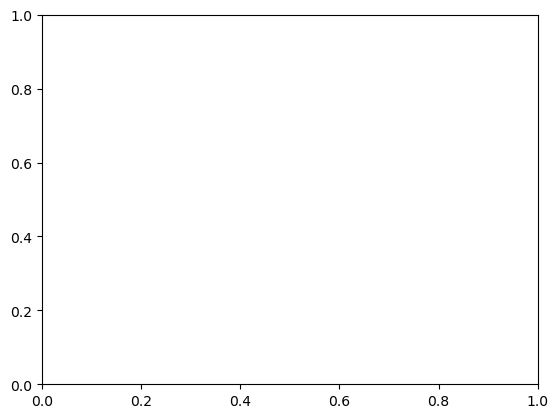

NameError: name 'time_pot_list' is not defined

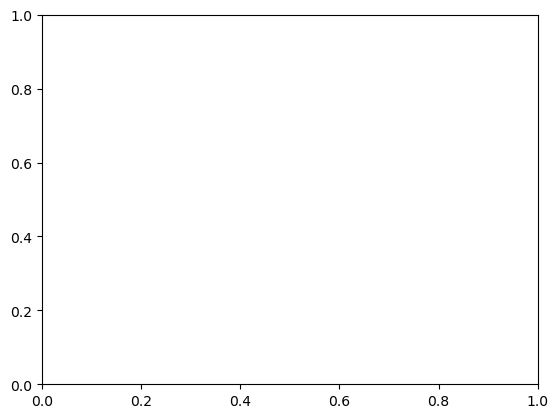

In [56]:
start_n=1500
end_n=10000
device='cpu'
step=500
k=10
n_list=range(start_n,end_n,step)[1:]
fig = plt.figure()
ax = plt.subplot(111)

plt.semilogy(n_list,time_pot_list[1:],label='partial OT')
for j in range(2):
#    plt.semilogy(n_list,time_v2_list[j][1:],label='ours,$\lambda=$'+str(Lambda_list[j]))
    plt.semilogy(n_list,time_sinkhorn_list[j][1:],label='ours_a,$\lambda=$'+str(Lambda_list[j]))
    plt.semilogy(n_list,time_lp_list[j][1:],label='lp: python ot, C, $\lambda=$'+str(Lambda_list[j]))
    plt.semilogy(n_list,time_new_list[j][1:],label='ours, $\lambda=$'+str(Lambda_list[j]))
box = ax.get_position()
ax.set_position([box.x0, box.y0 + box.height * 0.1,
                 box.width, box.height * 0.9])
plt.legend(loc='upper center',bbox_to_anchor=(0.5, 1.16),
          fancybox=True, shadow=True, ncol=3)
plt.xlabel('n: size of X')
plt.ylabel("wall time")
plt.savefig('experiment/test/results/time_numba.png',format='png',dpi=800,bbox_inches='tight')
#plt.title('wall-clock time with accelaration')
plt.show()